# Setup

In [8]:
import numpy as np 
import matplotlib.pyplot as plt 

def plot_series(time, series, format="-", start = 0, end= None, label=None):
    plt.plot(time[start:end], series[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("Value")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)
    


# Trend and Seasonality

In [9]:
def trend(time, slope = 0):
    return slope * time 


### Let's create a time series that just trends upward:

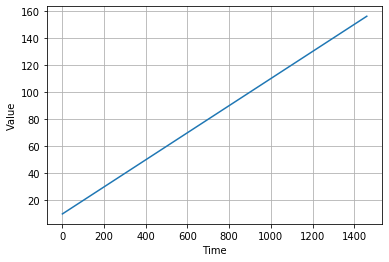

In [11]:
time = np.arange(4*365 + 1)
baseline = 10
series = baseline + trend(time,0.1) # this is just the line equation
plot_series(time, series)
plt.show()

### Now lest create a time series with seasonal patterns


In [12]:
def seasonal_pattern(season_time):
    return np.where(season_time < 0.4,
                   np.cos(season_time * 2 * np.pi),
                   1/np.exp(3*season_time))

def seasonality(time, period, amplitude=1, phase = 0):
    """Repeats the same patter at each period """
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

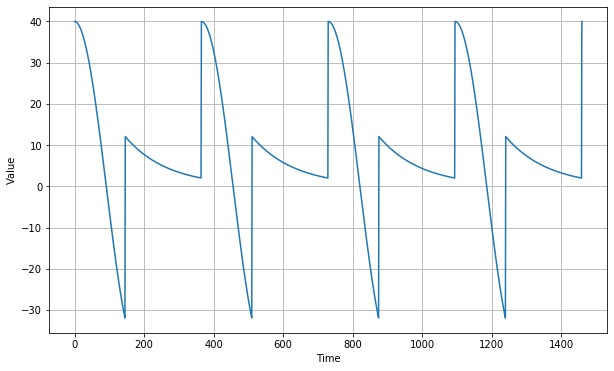

In [16]:
amplitude = 40
series = seasonality(time, period=365, amplitude=amplitude)
plt.figure(figsize=(10,6))
plot_series(time, series)

# A time  series that have both: trend and seasonality

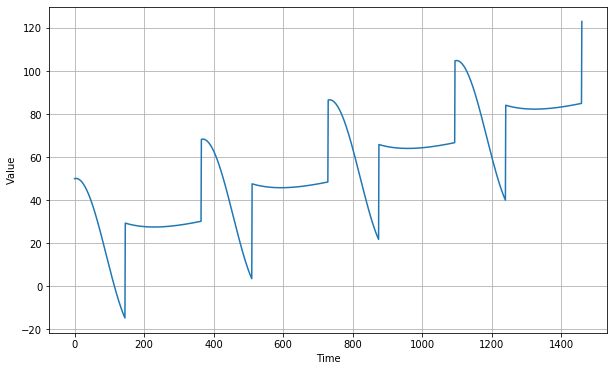

In [18]:
slope = 0.05 
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)
plt.figure(figsize=(10,6))
plot_series(time, series)
plt.show()

# Noise 
### because real life time series would contain some noise

In [19]:
def white_noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time))*noise_level

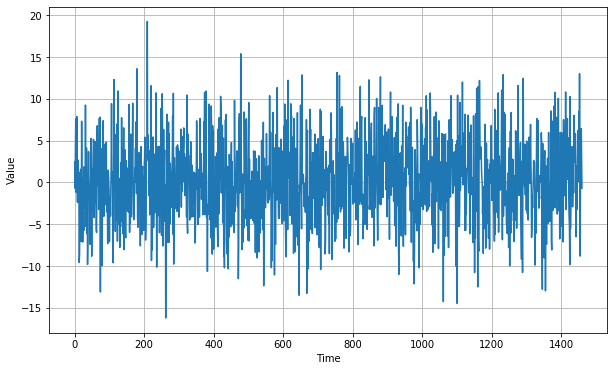

In [20]:
noise_level = 5 
noise = white_noise(time, noise_level, seed=42)
plt.figure(figsize=(10,6))
plot_series(time, noise)
plt.show()

### Let's add the noise to our time series:

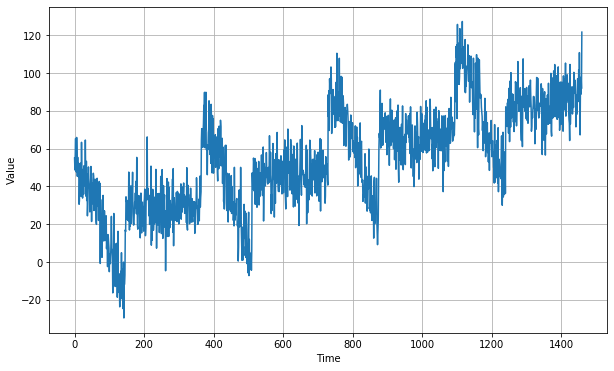

In [22]:
series += noise 

plt.figure(figsize=(10,6))
plot_series(time, series)
plt.show()